<a href="https://colab.research.google.com/github/felipemartinsn/sistema-de-recomendacao-via-imagens/blob/main/sistema_de_recomendacao.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import os
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import cosine_similarity
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing import image
from scipy.spatial.distance import euclidean

In [6]:
model = ResNet50(weights='imagenet', include_top=False, pooling='avg')

# Função para carregar e preprocessar a imagem
def preprocess_image(img_path):
    img = image.load_img(img_path, target_size=(224, 224))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array = preprocess_input(img_array)
    return img_array

# Função para extrair features da imagem
def extract_features(img_path):
    img_array = preprocess_image(img_path)
    features = model.predict(img_array)
    return features

# Função para calcular a similaridade entre duas imagens
def calculate_similarity(features1, features2, metric='cosine'):
    if metric == 'cosine':
        similarity = cosine_similarity(features1, features2)
        return similarity[0][0]
    elif metric == 'euclidean':
        distance = euclidean(features1, features2)
        return 1 / (1 + distance)  # Converter para um valor de similaridade

# Função de recomendação
def recommend_similar_images(input_img_path, image_paths, top_n=5):
    input_features = extract_features(input_img_path)
    similarities = []

    for img_path in image_paths:
        features = extract_features(img_path)
        similarity = calculate_similarity(input_features, features)
        similarities.append((img_path, similarity))

    similarities.sort(key=lambda x: x[1], reverse=True)

    return similarities[:top_n]

In [7]:
# Função para exibir as imagens recomendadas
def display_images(image_paths):
    plt.figure(figsize=(15, 5))
    for i, img_path in enumerate(image_paths):
        img = image.load_img(img_path, target_size=(224, 224))
        plt.subplot(1, len(image_paths), i + 1)
        plt.imshow(img)
        plt.axis('off')
        plt.title(f"Imagem {i+1}")
    plt.show()

In [8]:
image_directory = '/content/imagens'
image_paths = [os.path.join(image_directory, img) for img in os.listdir(image_directory) if img.endswith(('jpg', 'png'))]

In [12]:
# Imagem de entrada para recomendação
input_image_path = '/content/secador-teste.jpg'
recommendations = recommend_similar_images(input_image_path, image_paths)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 195ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 195ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 201ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 200ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 196ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 228ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 212ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 201ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 190ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 187ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 202ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 190ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 191ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 194ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 198ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 201ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 191ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 186ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 208ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 211ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 189ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 193ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 208ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 212ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 189ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 

Text(0.5, 1.0, 'Imagem de busca:')

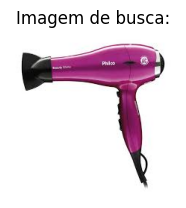

In [10]:
input_img = image.load_img(input_image_path, target_size=(224, 224))
plt.figure(figsize=(15, 5))
plt.subplot(1, len(recommendations) + 1, 1)
plt.imshow(input_img)
plt.axis('off')
plt.title("Imagem de busca:")


Recomendações de imagens similares:
Imagem: /content/imagens/secador7.jpg - Similaridade: 0.8977
Imagem: /content/imagens/secador4.jpg - Similaridade: 0.8876
Imagem: /content/imagens/secador8.jpg - Similaridade: 0.8813
Imagem: /content/imagens/secador12.jpg - Similaridade: 0.8725
Imagem: /content/imagens/secador10.jpg - Similaridade: 0.8655


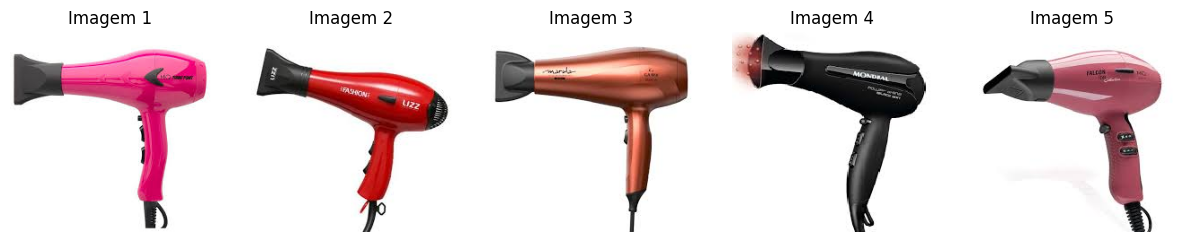

In [11]:
print("\nRecomendações de imagens similares:")
recommended_image_paths = []
for img_path, similarity in recommendations:
    print(f"Imagem: {img_path} - Similaridade: {similarity:.4f}")
    recommended_image_paths.append(img_path)

display_images(recommended_image_paths)

In [13]:
# Imagem de entrada para recomendação
input_image_path = '/content/garrafa-teste.jpg'
recommendations = recommend_similar_images(input_image_path, image_paths)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 224ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 213ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 197ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 200ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 200ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 195ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 194ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 196ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 195ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 197ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 197ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 205ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 195ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 199ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 200ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 201ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 192ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 191ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 195ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 201ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 191ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 190ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 197ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 204ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 199ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 

Text(0.5, 1.0, 'Imagem de busca:')

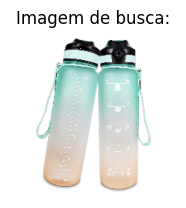

In [14]:
input_img = image.load_img(input_image_path, target_size=(224, 224))
plt.figure(figsize=(15, 5))
plt.subplot(1, len(recommendations) + 1, 1)
plt.imshow(input_img)
plt.axis('off')
plt.title("Imagem de busca:")


Recomendações de imagens similares:
Imagem: /content/imagens/garrafa1.jpg - Similaridade: 0.7675
Imagem: /content/imagens/garrafa15.jpg - Similaridade: 0.7379
Imagem: /content/imagens/garrafa14.jpg - Similaridade: 0.7175
Imagem: /content/imagens/garrafa4.jpg - Similaridade: 0.6875
Imagem: /content/imagens/garrafa10.jpg - Similaridade: 0.6873


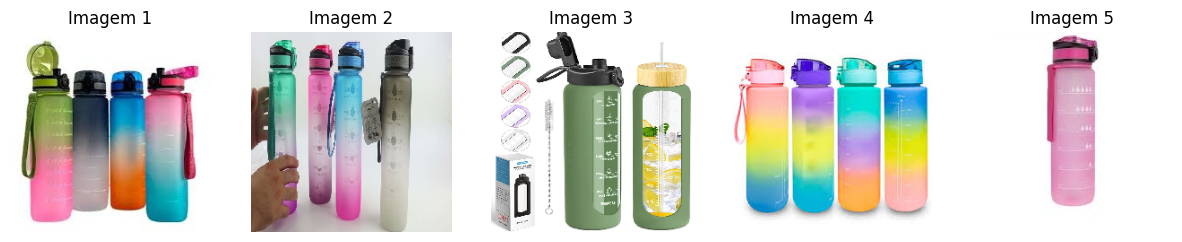

In [15]:
print("\nRecomendações de imagens similares:")
recommended_image_paths = []
for img_path, similarity in recommendations:
    print(f"Imagem: {img_path} - Similaridade: {similarity:.4f}")
    recommended_image_paths.append(img_path)

display_images(recommended_image_paths)

In [16]:
# Imagem de entrada para recomendação
input_image_path = '/content/pincel-teste.jpg'
recommendations = recommend_similar_images(input_image_path, image_paths)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 221ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 219ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 214ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 197ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 205ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 197ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 210ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 210ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 195ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 192ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 208ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 206ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 192ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 192ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 206ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 236ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 327ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 332ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 330ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 329ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 336ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 312ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 338ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 377ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 281ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 

Text(0.5, 1.0, 'Imagem de busca:')

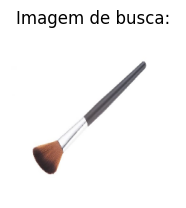

In [17]:
input_img = image.load_img(input_image_path, target_size=(224, 224))
plt.figure(figsize=(15, 5))
plt.subplot(1, len(recommendations) + 1, 1)
plt.imshow(input_img)
plt.axis('off')
plt.title("Imagem de busca:")


Recomendações de imagens similares:
Imagem: /content/imagens/pincel5.jpg - Similaridade: 0.7627
Imagem: /content/imagens/pincel10.jpg - Similaridade: 0.7241
Imagem: /content/imagens/pincel13.jpg - Similaridade: 0.7234
Imagem: /content/imagens/pincel8.jpg - Similaridade: 0.7125
Imagem: /content/imagens/pincel12.jpg - Similaridade: 0.7119


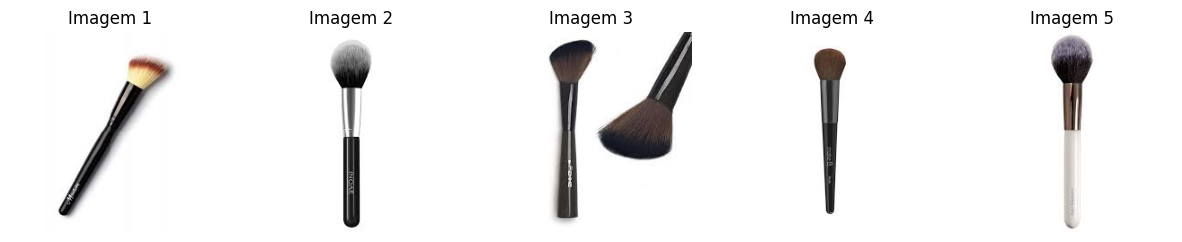

In [18]:
print("\nRecomendações de imagens similares:")
recommended_image_paths = []
for img_path, similarity in recommendations:
    print(f"Imagem: {img_path} - Similaridade: {similarity:.4f}")
    recommended_image_paths.append(img_path)

display_images(recommended_image_paths)

In [19]:
# Imagem de entrada para recomendação
input_image_path = '/content/urso-teste.jpg'
recommendations = recommend_similar_images(input_image_path, image_paths)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 187ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 195ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 212ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 189ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 186ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 203ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 219ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 196ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 193ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 194ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 223ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 194ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 189ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 188ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 196ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 193ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 190ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 194ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 194ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 196ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 195ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 208ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 196ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 204ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 191ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 

Text(0.5, 1.0, 'Imagem de busca:')

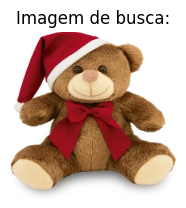

In [20]:
input_img = image.load_img(input_image_path, target_size=(224, 224))
plt.figure(figsize=(15, 5))
plt.subplot(1, len(recommendations) + 1, 1)
plt.imshow(input_img)
plt.axis('off')
plt.title("Imagem de busca:")


Recomendações de imagens similares:
Imagem: /content/imagens/urso11.jpg - Similaridade: 0.6837
Imagem: /content/imagens/urso7.jpg - Similaridade: 0.6797
Imagem: /content/imagens/urso1.jpg - Similaridade: 0.6714
Imagem: /content/imagens/urso13.jpg - Similaridade: 0.6668
Imagem: /content/imagens/urso2.jpg - Similaridade: 0.6552


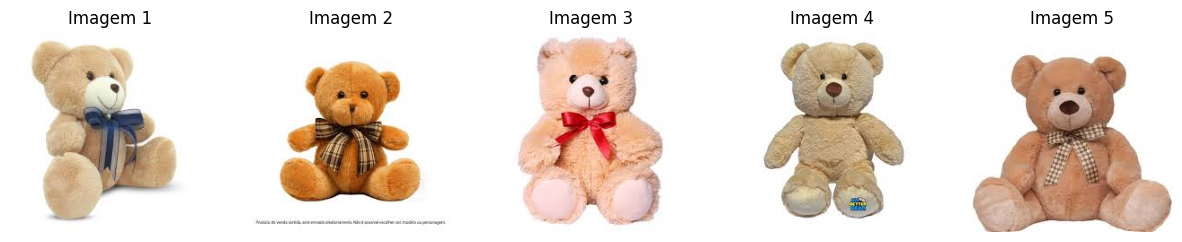

In [21]:
print("\nRecomendações de imagens similares:")
recommended_image_paths = []
for img_path, similarity in recommendations:
    print(f"Imagem: {img_path} - Similaridade: {similarity:.4f}")
    recommended_image_paths.append(img_path)

display_images(recommended_image_paths)